## Plots 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Preprocessing import *

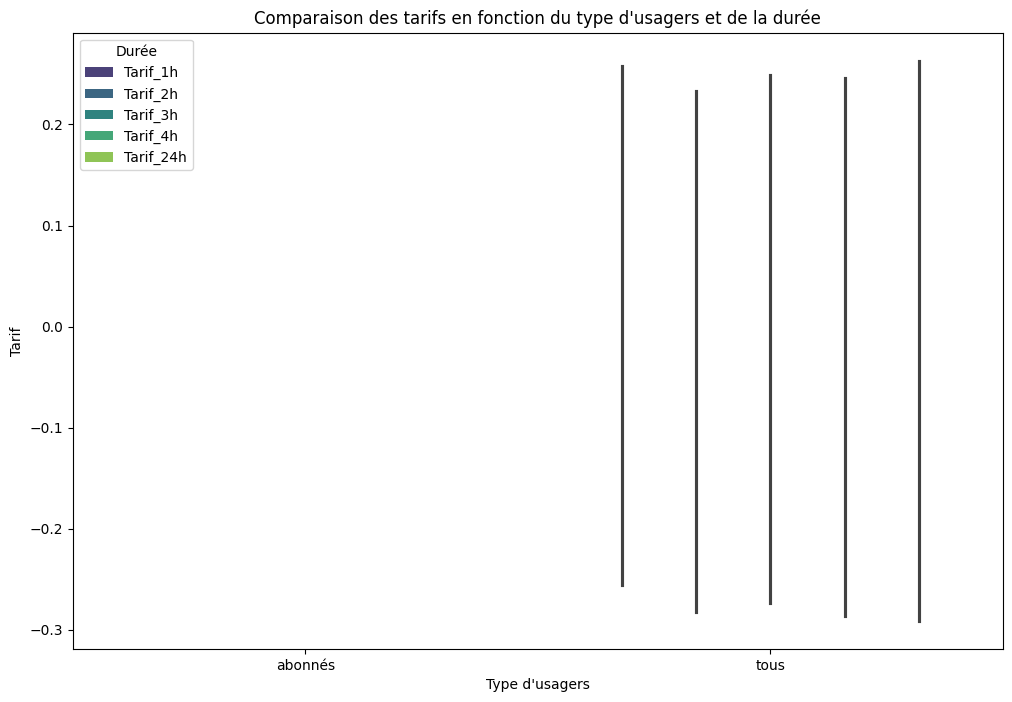

In [4]:


def compare_tarifs(df):
    # Sélection des colonnes de tarifs à comparer
    tarifs_columns = ['Tarif_1h', 'Tarif_2h', 'Tarif_3h', 'Tarif_4h','Tarif_24h']

    # Création d'un sous-DataFrame avec les colonnes sélectionnées
    df_tarifs = df[['Type usagers'] + tarifs_columns]

    # Transformation des données pour les graphiques à barres groupées
    df_tarifs_grouped = pd.melt(df_tarifs, id_vars=['Type usagers'], value_vars=tarifs_columns, var_name='Durée', value_name='Tarif')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Type usagers', y='Tarif', hue='Durée', data=df_tarifs_grouped, palette='viridis')
    plt.title('Comparaison des tarifs en fonction du type d\'usagers et de la durée')
    plt.xlabel('Type d\'usagers')
    plt.ylabel('Tarif')
    plt.show()

# Utilisation de la fonction
compare_tarifs(df)


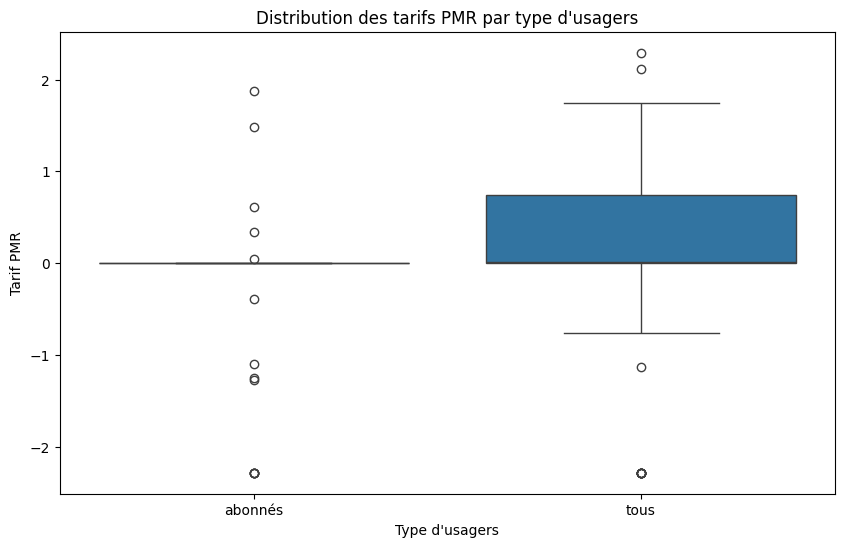

In [5]:
# Exemple de boîte à moustaches pour les tarifs PMR


def plot_tarif_pmr_by_user_type(data):
    """
    Trace la distribution des tarifs PMR par type d'usagers.

    Args:
    data (DataFrame): DataFrame contenant les données à visualiser.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Type usagers', y='Tarif abonnement PMR mensuel', data=data)
    plt.title('Distribution des tarifs PMR par type d\'usagers')
    plt.xlabel('Type d\'usagers')
    plt.ylabel('Tarif PMR')
    plt.show()

# Appel de la fonction pour tracer la distribution des tarifs PMR par type d'usagers
plot_tarif_pmr_by_user_type(df)



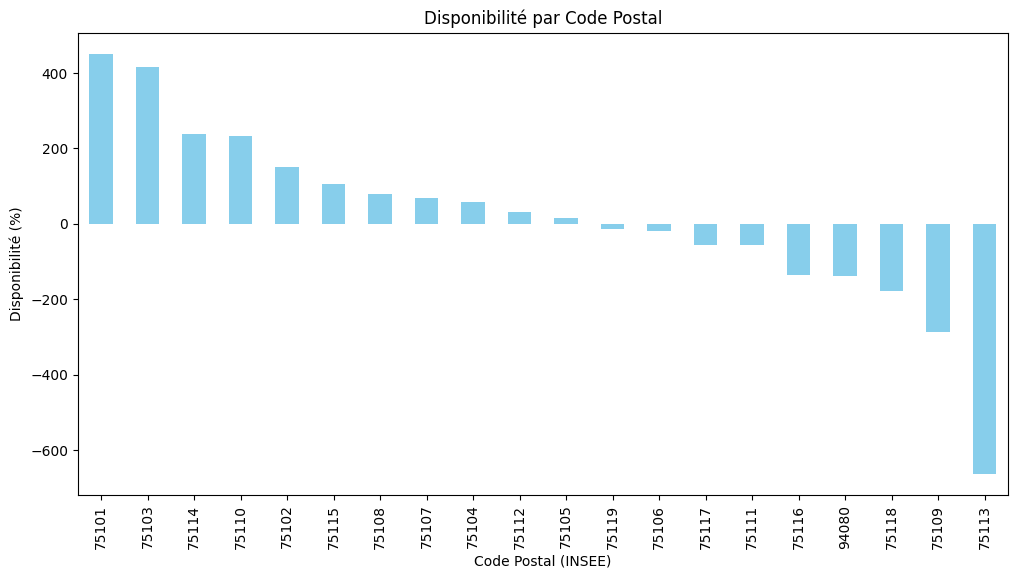

In [6]:


def plot_disponibilite_par_code_postal(data):
    """
    Crée un graphique à barres montrant la disponibilité par code postal.

    Args:
    data (DataFrame): DataFrame contenant les données à utiliser.

    Returns:
    None
    """
    # Calcul de la disponibilité en pourcentage
    data['Disponibilite'] = (data['Nbre total places'] - data['Nbre place PMR']) / data['Nbre total places'] * 100

    # Création du graphique à barres
    plt.figure(figsize=(12, 6))
    data.groupby('INSEE')['Disponibilite'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('Disponibilité par Code Postal')
    plt.xlabel('Code Postal (INSEE)')
    plt.ylabel('Disponibilité (%)')
    plt.show()

# Appel de la fonction pour créer le graphique de disponibilité par code postal
plot_disponibilite_par_code_postal(df)


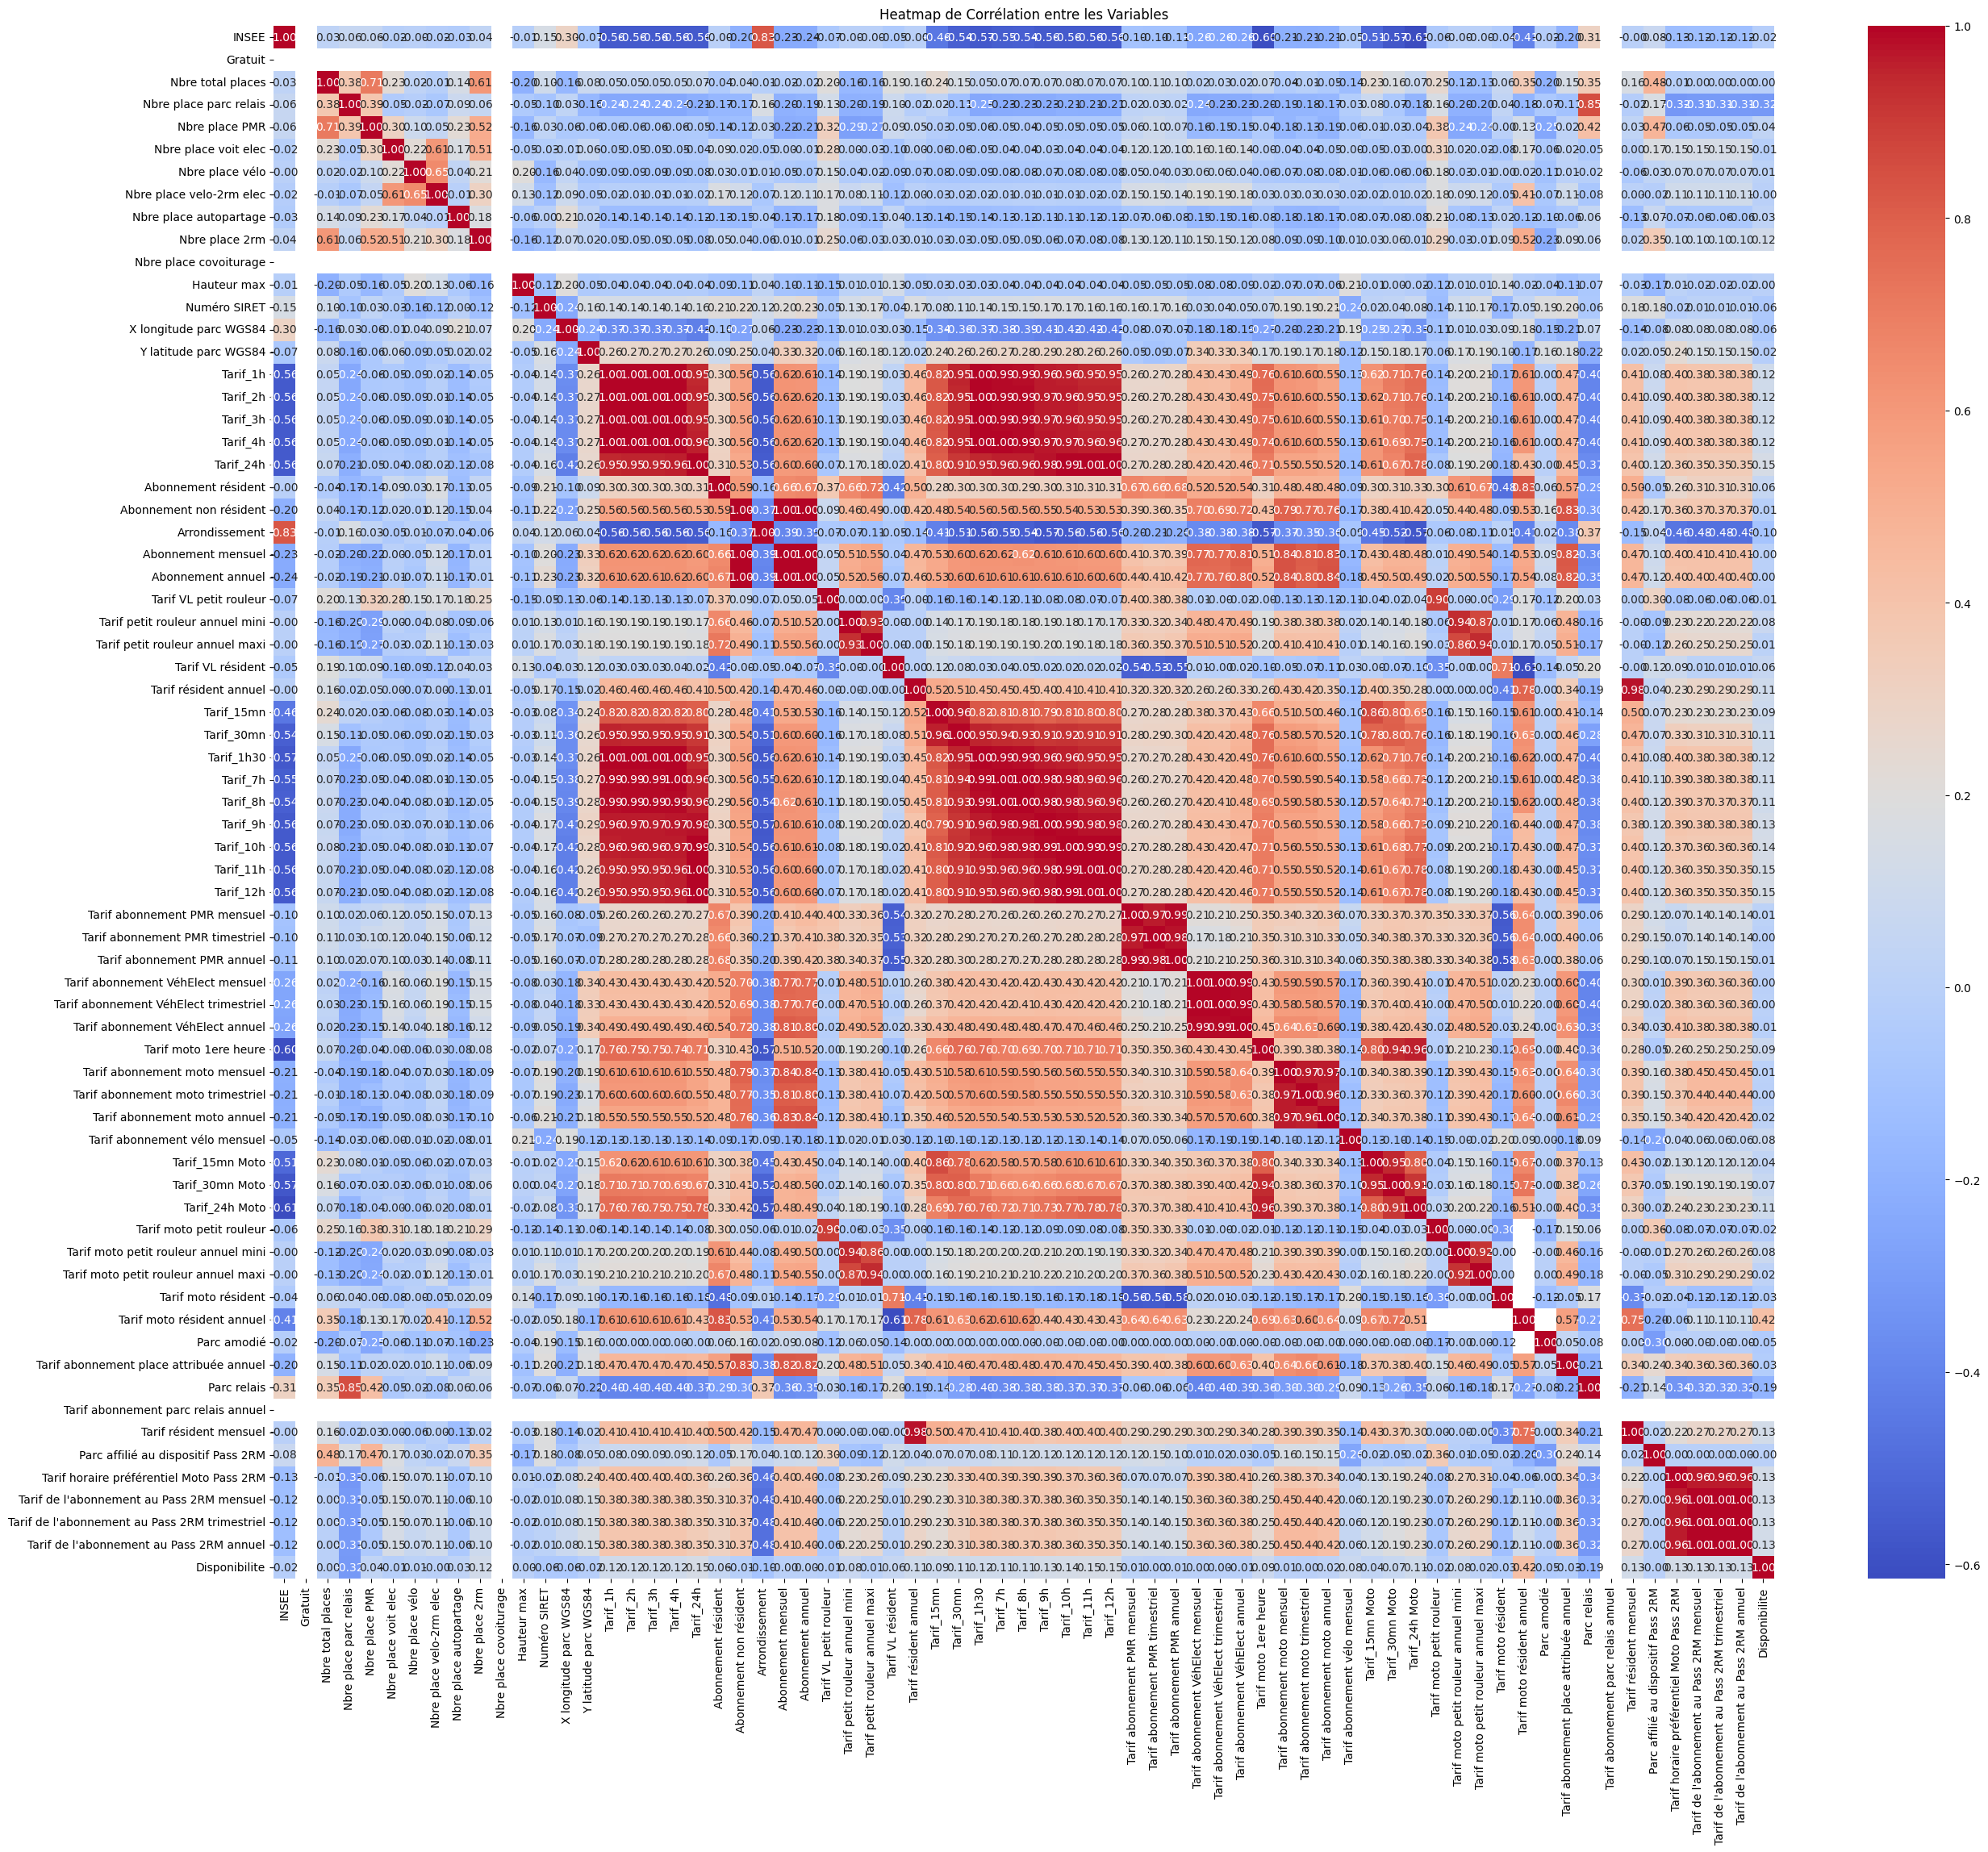

In [7]:


def plot_correlation_heatmap(data):
    """
    Crée une heatmap de corrélation entre les variables numériques.

    Args:
    data (DataFrame): DataFrame contenant les données numériques.

    Returns:
    None
    """
    # Sélection des variables numériques
    df_numerical = data.select_dtypes(include='number')

    # Calcul de la matrice de corrélation
    correlation_matrix = df_numerical.corr()

    # Création de la heatmap
    plt.figure(figsize=(30, 25))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap de Corrélation entre les Variables')
    plt.show()

# Appel de la fonction pour créer la heatmap de corrélation
plot_correlation_heatmap(df)


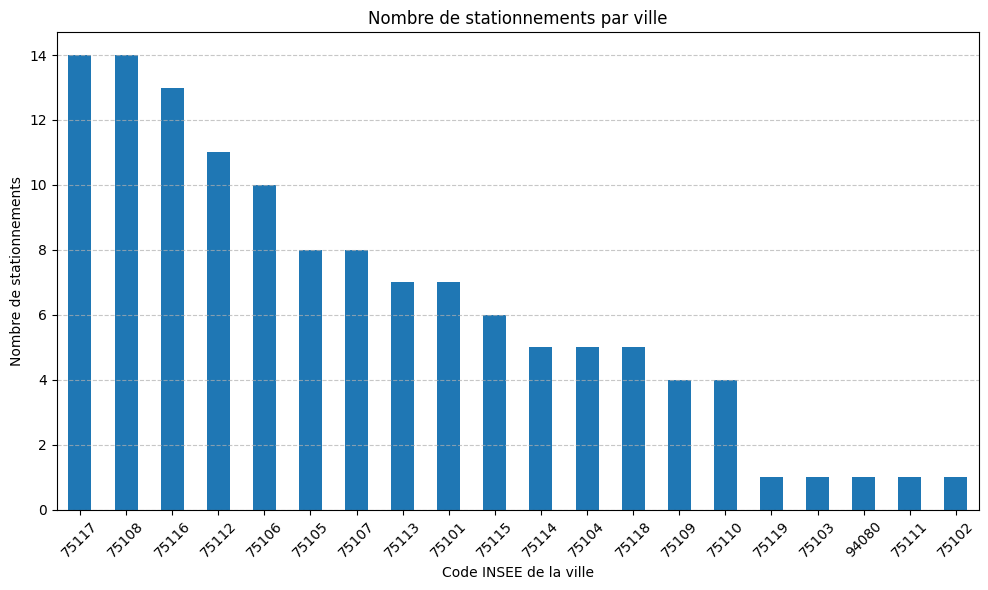

In [8]:



def plot_stationnements_par_ville(df):
    # Compter le nombre de stationnements par ville
    stationnements_par_ville = df['INSEE'].value_counts()

    # Tracer le diagramme à barres
    plt.figure(figsize=(10, 6))
    stationnements_par_ville.plot(kind='bar')
    plt.title('Nombre de stationnements par ville')
    plt.xlabel('Code INSEE de la ville')
    plt.ylabel('Nombre de stationnements')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_stationnements_par_ville(df)



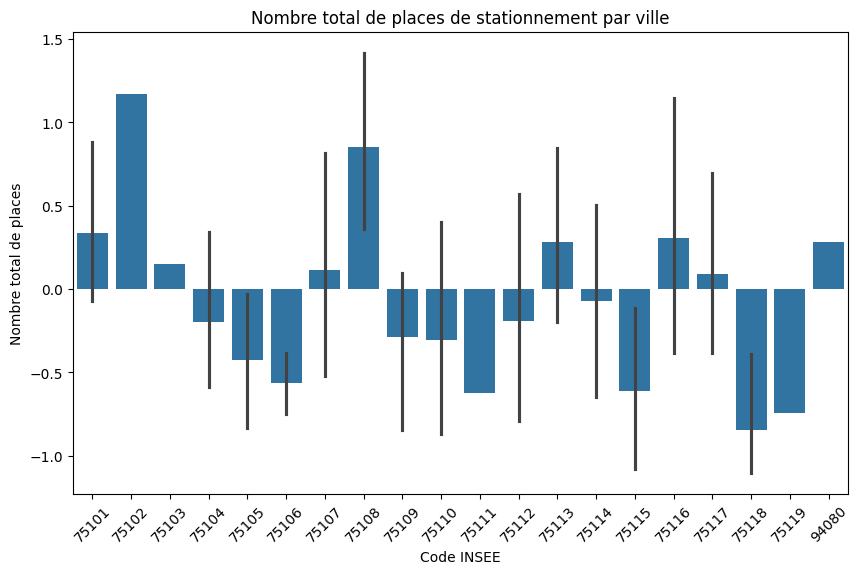

In [10]:
def plot_nb_places_stationnement_par_ville(df):
    """
    Analyse et trace le nombre total de places de stationnement par ville.
    
    Args:
    data (DataFrame): DataFrame contenant les données à analyser.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x='INSEE', y='Nbre total places', data=df)
    plt.title('Nombre total de places de stationnement par ville')
    plt.xlabel('Code INSEE')
    plt.ylabel('Nombre total de places')
    plt.xticks(rotation=45)
    plt.show()
plot_nb_places_stationnement_par_ville(df)

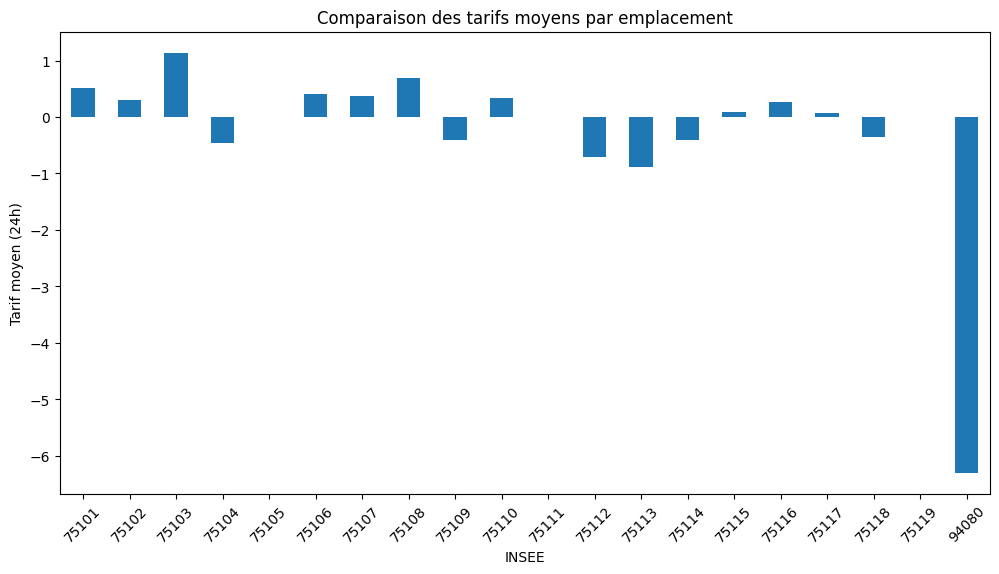

In [12]:
def plot_mean_tarif_by_location(df):
    """
    Analyse et trace la comparaison des tarifs moyens par emplacement.
    
    Args:
    data (DataFrame): DataFrame contenant les données à analyser.
    """
    mean_tarif_by_location = df.groupby('INSEE')['Tarif_24h'].mean()
    mean_tarif_by_location.plot(kind='bar', figsize=(12, 6))
    plt.title('Comparaison des tarifs moyens par emplacement')
    plt.xlabel('INSEE')
    plt.ylabel('Tarif moyen (24h)')
    plt.xticks(rotation=45)
    plt.show()
plot_mean_tarif_by_location(df)

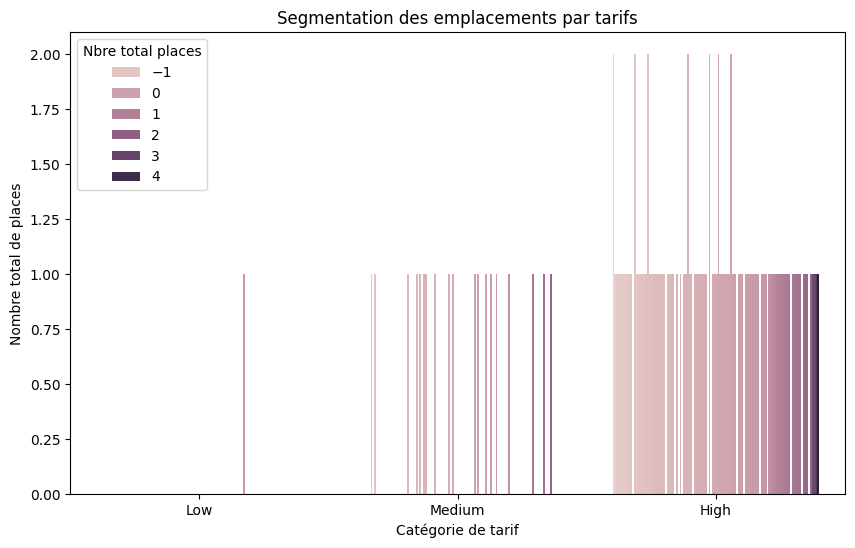

In [16]:
def plot_tarif_segmentation(df):
    """
    Analyse et trace la segmentation des emplacements par tarifs.

    Args:
    data (DataFrame): DataFrame contenant les données à analyser.
    """
    # Création de la catégorie de tarif
    df['Tarif_Category'] = pd.cut(df['Tarif_24h'], bins=3, labels=['Low', 'Medium', 'High'])

    # Plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Tarif_Category', hue='Nbre total places')
    plt.title('Segmentation des emplacements par tarifs')
    plt.xlabel('Catégorie de tarif')
    plt.ylabel('Nombre total de places')
    plt.show()
plot_tarif_segmentation(df)

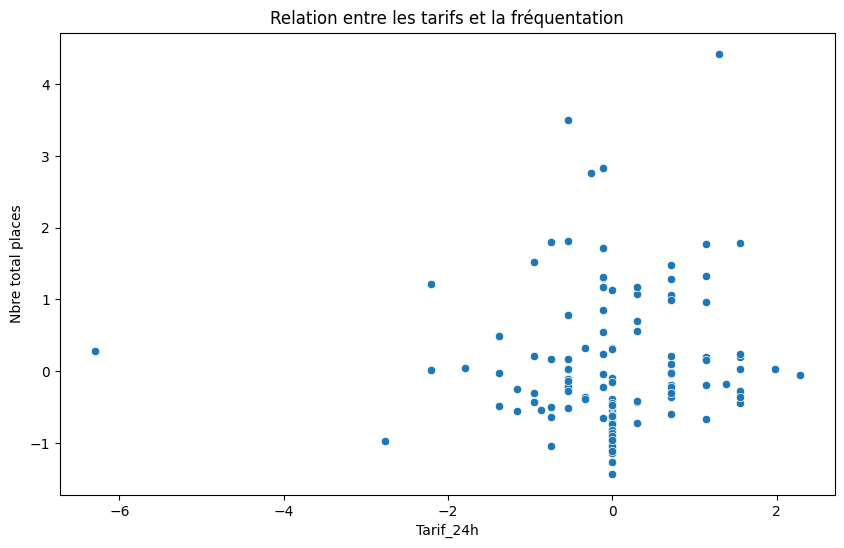

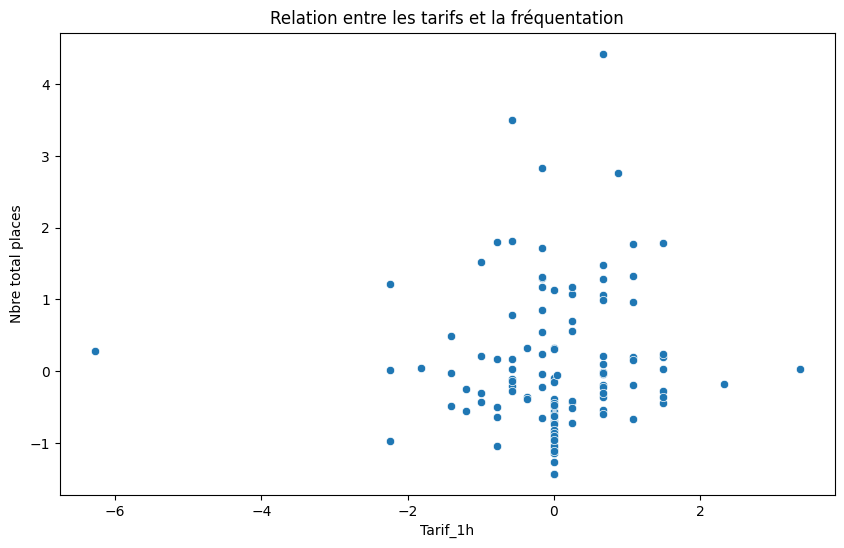

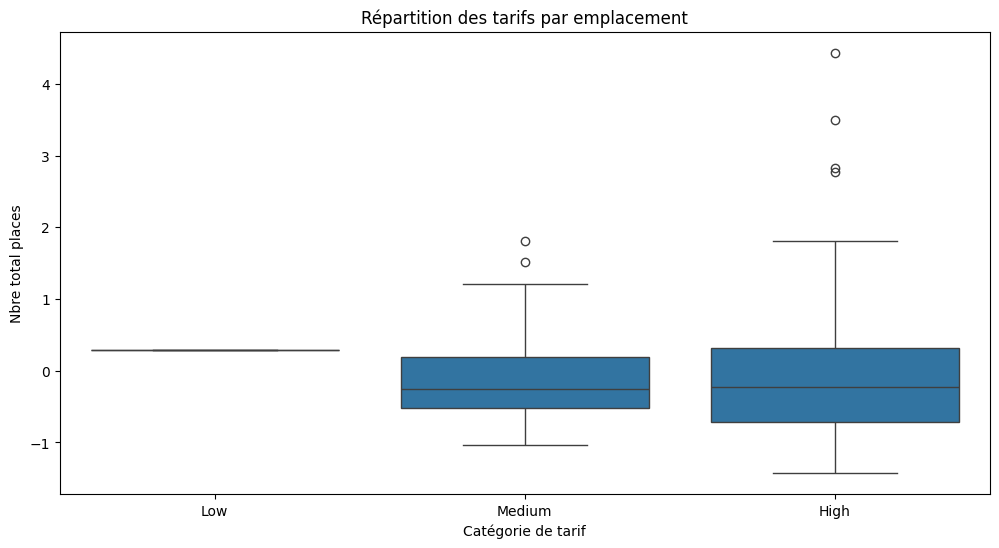

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyse_relation_tarif_frequentation(df, tarif_column, frequentation_column):
    """
    Analyse la relation entre les tarifs et la fréquentation.

    Args:
    data (DataFrame): DataFrame contenant les données.
    tarif_column (str): Nom de la colonne des tarifs.
    frequentation_column (str): Nom de la colonne de la fréquentation.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=tarif_column, y=frequentation_column)
    plt.title('Relation entre les tarifs et la fréquentation')
    plt.xlabel(tarif_column)
    plt.ylabel(frequentation_column)
    plt.show()

def analyse_repartition_tarifs_emplacement(df, tarif_category_column, frequentation_column):
    """
    Analyse la répartition des tarifs par emplacement.

    Args:
    data (DataFrame): DataFrame contenant les données.
    tarif_category_column (str): Nom de la colonne de catégorie de tarif.
    frequentation_column (str): Nom de la colonne de la fréquentation.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=tarif_category_column, y=frequentation_column)
    plt.title('Répartition des tarifs par emplacement')
    plt.xlabel('Catégorie de tarif')
    plt.ylabel(frequentation_column)
    plt.show()

# Appels des fonctions pour analyser la relation entre les tarifs et la fréquentation
analyse_relation_tarif_frequentation(df, 'Tarif_24h', 'Nbre total places')
analyse_relation_tarif_frequentation(df, 'Tarif_1h', 'Nbre total places')

# Appel de la fonction pour analyser la répartition des tarifs par emplacement
analyse_repartition_tarifs_emplacement(df, 'Tarif_Category', 'Nbre total places')
